<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/FeatureSelection_wineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install --upgrade scikit-learn mlxtend

In [33]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/winequality.csv"

df = pd.read_csv(url)
df.head()
df_encoded = pd.get_dummies(df,columns=['type'])
df = df_encoded
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False,True
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False,True
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False,True
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False,True
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,True,False
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,True,False
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,True,False
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,True,False


In [34]:
# features and target declariation
print(df.shape)
X = df.drop('quality', axis = 1)

# fixing NaN values using Simple Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X=imputer.fit_transform(X)

#scaling data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X)
y = df['quality']
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(6497, 14)
(6497, 13)
(6497,)
(5197, 13)
(1300, 13)
(5197,)
(1300,)


In [36]:
# baseline model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
print("training", np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')))
print("testing", np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring='accuracy')))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

training 0.5428105796994152
testing 0.5407692307692308


In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(model,k_features='best',forward=True,floating=False,scoring='accuracy', cv=5)
sfs.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 13),
                          scoring='accuracy')

In [38]:
sfs.k_feature_idx_

(0, 1, 3, 5, 6, 7, 8, 9, 10)

In [48]:
feature_names = []
sfs_list = list(sfs.k_feature_idx_)
for i in sfs_list:
  feature_names.append(df.columns[i])

print(feature_names)

['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [39]:
sfs.k_score_

0.5470428296438884

In [40]:
metric_df=pd.DataFrame.from_dict(sfs.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.5115384615384615, 0.5326923076923077, 0.518...",0.512407,"(10,)",0.016572,0.012894,0.006447
2,"(1, 10)","[0.5125, 0.5423076923076923, 0.523580365736284...",0.520875,"(1, 10)",0.015106,0.011753,0.005877
3,"(1, 7, 10)","[0.5375, 0.5596153846153846, 0.538979788257940...",0.534341,"(1, 7, 10)",0.02019,0.015709,0.007854
4,"(1, 7, 8, 10)","[0.5394230769230769, 0.5586538461538462, 0.539...",0.539153,"(1, 7, 8, 10)",0.014038,0.010922,0.005461
5,"(1, 5, 7, 8, 10)","[0.5403846153846154, 0.5586538461538462, 0.532...",0.538768,"(1, 5, 7, 8, 10)",0.013537,0.010532,0.005266
6,"(1, 5, 6, 7, 8, 10)","[0.5461538461538461, 0.5567307692307693, 0.534...",0.540307,"(1, 5, 6, 7, 8, 10)",0.012484,0.009713,0.004856
7,"(1, 5, 6, 7, 8, 9, 10)","[0.5403846153846154, 0.5557692307692308, 0.534...",0.541079,"(1, 5, 6, 7, 8, 9, 10)",0.009782,0.007611,0.003805
8,"(0, 1, 5, 6, 7, 8, 9, 10)","[0.5576923076923077, 0.551923076923077, 0.5389...",0.543001,"(0, 1, 5, 6, 7, 8, 9, 10)",0.013478,0.010487,0.005243
9,"(0, 1, 3, 5, 6, 7, 8, 9, 10)","[0.5586538461538462, 0.5538461538461539, 0.544...",0.547043,"(0, 1, 3, 5, 6, 7, 8, 9, 10)",0.01049,0.008161,0.004081
10,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10)","[0.5576923076923077, 0.5576923076923077, 0.543...",0.546465,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10)",0.012415,0.009659,0.00483


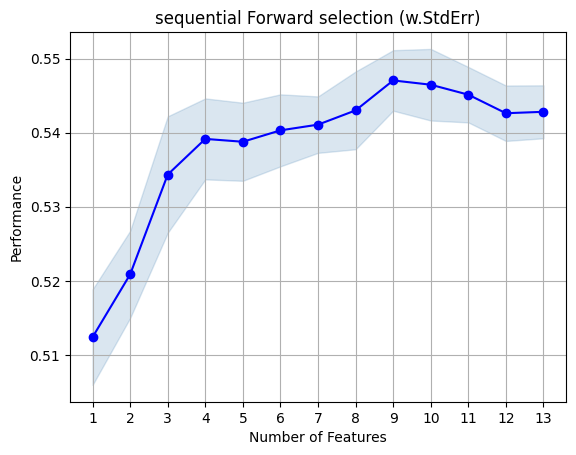

In [42]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1=plot_sfs(sfs.get_metric_dict(),kind='std_err')
plt.title("sequential Forward selection (w.StdErr)")
plt.grid()
plt.show()

In [53]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs_back = SFS(model,k_features='best',forward=False,floating=False,scoring='accuracy', cv=5)
sfs_back.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 13), scoring='accuracy')

In [54]:
sfs_back.k_feature_idx_


(0, 1, 4, 5, 6, 7, 8, 9, 10)

In [55]:
sfs_back.k_score_

0.5458882431331903

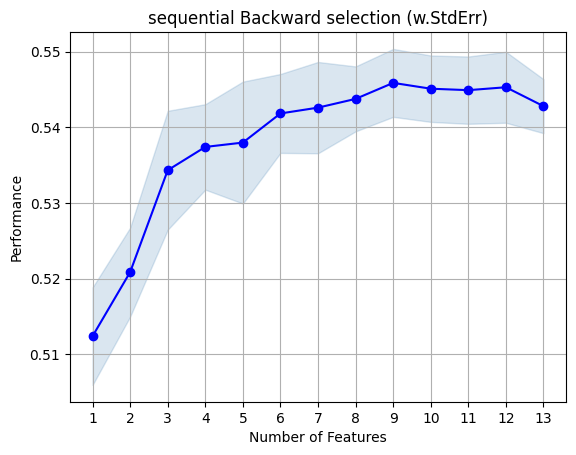

In [56]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1=plot_sfs(sfs_back.get_metric_dict(),kind='std_err')
plt.title("sequential Backward selection (w.StdErr)")
plt.grid()
plt.show()

In [60]:
feature_names_back = []
sfs_list = list(sfs_back.k_feature_idx_)
for i in sfs_list:
  feature_names_back.append(df.columns[i])

print(feature_names_back)

['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [59]:
feature_names = []
sfs_list = list(sfs.k_feature_idx_)
for i in sfs_list:
  feature_names.append(df.columns[i])

print(feature_names)

['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [61]:
metric_df=pd.DataFrame.from_dict(sfs_back.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.551923076923077, 0.5471153846153847, 0.5457...",0.542811,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.009176,0.007139,0.00357
12,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5586538461538462, 0.5538461538461539, 0.541...",0.54531,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.012059,0.009382,0.004691
11,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.5528846153846154, 0.5557692307692308, 0.546...",0.544926,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.011434,0.008896,0.004448
10,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11)","[0.551923076923077, 0.5567307692307693, 0.5466...",0.545119,"(0, 1, 4, 5, 6, 7, 8, 9, 10, 11)",0.011278,0.008775,0.004387
9,"(0, 1, 4, 5, 6, 7, 8, 9, 10)","[0.5538461538461539, 0.5567307692307693, 0.546...",0.545888,"(0, 1, 4, 5, 6, 7, 8, 9, 10)",0.01154,0.008979,0.004489
8,"(0, 1, 4, 6, 7, 8, 9, 10)","[0.5490384615384616, 0.5548076923076923, 0.547...",0.543772,"(0, 1, 4, 6, 7, 8, 9, 10)",0.011033,0.008584,0.004292
7,"(0, 1, 4, 6, 7, 9, 10)","[0.5461538461538461, 0.5625, 0.543792107795957...",0.542616,"(0, 1, 4, 6, 7, 9, 10)",0.015514,0.01207,0.006035
6,"(0, 1, 6, 7, 9, 10)","[0.5461538461538461, 0.5576923076923077, 0.544...",0.541847,"(0, 1, 6, 7, 9, 10)",0.013406,0.01043,0.005215
5,"(0, 1, 6, 7, 10)","[0.5528846153846154, 0.5596153846153846, 0.536...",0.537996,"(0, 1, 6, 7, 10)",0.020716,0.016118,0.008059
4,"(1, 6, 7, 10)","[0.5413461538461538, 0.5548076923076923, 0.539...",0.537421,"(1, 6, 7, 10)",0.014515,0.011293,0.005647


In [65]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=model,n_features_to_select=1)

rfe.fit(X_train,y_train)
ranking = rfe.ranking_
print(ranking)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[ 6  2 13  5  3  9 12  7  8 11  1  4 10]


In [71]:
X_pd = pd.DataFrame(X, columns=df.columns[:-1])
X_pd.columns

for i,j in enumerate(X_pd.columns):
  # print(i,j)
  print(f"{j}: {ranking[i]}")

fixed acidity: 6
volatile acidity: 2
citric acid: 13
residual sugar: 5
chlorides: 3
free sulfur dioxide: 9
total sulfur dioxide: 12
density: 7
pH: 8
sulphates: 11
alcohol: 1
quality: 4
type_red: 10


In [72]:
import pandas as pd
# Sort features by ranking
sorted_features = sorted(zip(X_pd.columns, ranking), key=lambda x: x[1])

# Print sorted features
for feature, rank in sorted_features:
    print(f"{feature}: {rank}")

alcohol: 1
volatile acidity: 2
chlorides: 3
quality: 4
residual sugar: 5
fixed acidity: 6
density: 7
pH: 8
free sulfur dioxide: 9
type_red: 10
sulphates: 11
total sulfur dioxide: 12
citric acid: 13
